In [1]:
# Import Dependencies
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import calendar

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import & Read CSV generated from DarkSky Weather API
Pitts = "Ste_Crime_severity_Output.csv"
Ste_Crime_severity_Output_df = pd.read_csv(Pitts)
Ste_Crime_severity_Output_df.head(2)

,Unnamed: 0,Age,Gender,Race,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,0,24,F,B,M,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,1,31,M,W,M,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1


In [3]:
del Ste_Crime_severity_Output_df['Unnamed: 0']
Ste_Crime_severity_Output_df.head(2)

,Age,Gender,Race,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,24,F,B,M,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,31,M,W,M,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1


In [4]:
#Ste_Crime_severity_Output_df.describe()

In [5]:
new_crime_df = Ste_Crime_severity_Output_df[(Ste_Crime_severity_Output_df.Age > 0) & 
                                            (Ste_Crime_severity_Output_df.Age <= 100)]

In [6]:
#new_crime_df.describe()

In [7]:
# Weather vs Crime Frequency / Crime Type
    # Temperature (Hot vs Cold)
        # X-Axis: Temperature (Ex. Very Cold, Cold, Moderate, Hot, Very Hot, etc.)
        # Y-Axis: Amount of Crime (measured by incident number)
    # Weather Condition: 
        # X-Axis: Type of weather (ie rain, sun, snow, etc.)
        # Y-Axis: Amount of Crime (measured by incident number)


In [8]:
# Crime Frequency vs Incident Location (Heatmap) (Liam)
    # Crime Frequency vs Police Zone (Heatmap) (Liam)


In [9]:
# Crime Severity vs Incident Location (Heatmap) (Liam)


In [10]:
# Age, Gender and Race vs Crime (Pie Charts?)
    # Crime Frequency
        # Grouped by incident location & date
    # Crime Type
    # Crime Severity (Felonies, Misdemeanors or Violations/Infractions)

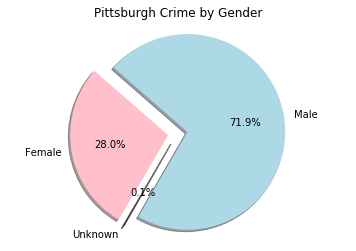

In [11]:
gender_count = new_crime_df["Gender"].value_counts()
total_gender_count = new_crime_df["Gender"].count()
gender_percentage = (gender_count/total_gender_count) *100

Gender = ["Male", "Female", "Unknown"]
Percent = [gender_percentage]
colors = ["LightBlue", "Pink", "Black"]
explode = (0.1, 0.1, 0.1)


plt.pie(gender_percentage, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Gender")

plt.show()

In [12]:
new_crime_df["Offenses Severity"].unique()

array(['M', 'F', 'Murder of 1st Degree'], dtype=object)

In [13]:
crime_type_count = new_crime_df["Offenses Severity"].value_counts()
crime_type_count

M                       13099
F                        5376
Murder of 1st Degree        2
Name: Offenses Severity, dtype: int64

In [14]:
total_crime_count = new_crime_df["Offenses Severity"].count()
total_crime_count

18477

In [15]:
crime_percentage = (crime_type_count/total_crime_count) *100
crime_percentage

M                       70.893543
F                       29.095632
Murder of 1st Degree     0.010824
Name: Offenses Severity, dtype: float64

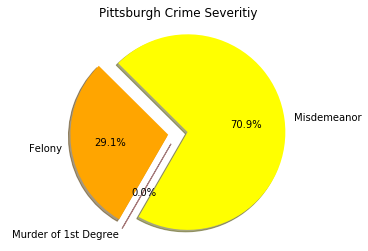

In [16]:
crime_type_count = new_crime_df["Offenses Severity"].value_counts()
total_crime_count = new_crime_df["Offenses Severity"].count()
crime_percentage = (crime_type_count/total_crime_count) *100

Offenses = ["Misdemeanor", "Felony", "Murder of 1st Degree"]
Percent = [crime_percentage]
colors = ["Yellow", "Orange", "Red"]
explode = (0.1, 0.1, 0.1)


plt.pie(crime_percentage, explode=explode, labels=Offenses, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Severitiy")

plt.show()

AttributeError: 'SeriesPlotMethods' object has no attribute 'set_xlabel'

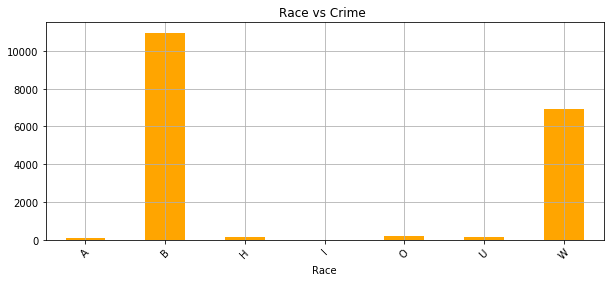

In [18]:

race_group = new_crime_df.groupby("Race")
race_type_crime = race_group["Offenses Severity"].count()
race_plot = race_type_crime.plot(kind="bar", title="Race vs Crime ", rot='45', color='orange', figsize=(10,4),grid=True)
race_type_crime.plot.set_xlabel("Races")
race_type_crime.plot.set_ylabel("Number of crimes")
plt.show()

In [19]:
crime_df = new_crime_df.loc[:,["Age","Race", "Gender", "Offenses Severity", "Arrest Year", 
                               "Arrest Month", "Weather Condition","Temperature"]]
crime_df.head()

,Age,Race,Gender,Offenses Severity,Arrest Year,Arrest Month,Weather Condition,Temperature
0,24,B,F,M,2016,February,Mostly Cloudy,20.53
1,31,W,M,M,2016,February,Overcast,32.76
2,22,W,M,F,2016,April,Light Rain,50.96
3,36,W,M,M,2016,April,Overcast,39.39
4,60,W,M,M,2016,April,Overcast,32.63


In [20]:
#Establish bins for ages
bins = [18,25,30,35,40,45,50,55,60,65,70,80,90,100]
group_labels = ["<18","18-25","25-30","30-35","35-40","40-45","45-50","50-55", "55-60","60-65","65-70", "70-80", ">80"]

In [21]:
pd.cut(crime_df["Age"], bins, labels = group_labels).head(10)

0      <18
1    25-30
2      <18
3    30-35
4    50-55
5    45-50
6      <18
7    18-25
8    18-25
9    25-30
Name: Age, dtype: category
Categories (13, object): [<18 < 18-25 < 25-30 < 30-35 ... 60-65 < 65-70 < 70-80 < >80]

In [22]:
crime_df["Age_group"] = pd.cut(crime_df["Age"], bins, labels = group_labels) 
crime_df.head()

,Age,Race,Gender,Offenses Severity,Arrest Year,Arrest Month,Weather Condition,Temperature,Age_group
0,24,B,F,M,2016,February,Mostly Cloudy,20.53,<18
1,31,W,M,M,2016,February,Overcast,32.76,25-30
2,22,W,M,F,2016,April,Light Rain,50.96,<18
3,36,W,M,M,2016,April,Overcast,39.39,30-35
4,60,W,M,M,2016,April,Overcast,32.63,50-55


In [ ]:
#{'A':'Asian','B':'Black','H':'Hispanic/Latino','I':'American Indian or Alaskan Native','O':'Others', 'U':'Unknown', 'W':'White'}

In [23]:
felonies = renamed_race_df[:1].values[0]
felonies

NameError: name 'renamed_race_df' is not defined

In [ ]:
misdemeanor = renamed_race_df[1:2].values[0]
misdemeanor

In [ ]:
murder = renamed_race_df[2:3].values[0]
murder

In [ ]:
number_of_x = np.arange(7)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)
p3 = plt.bar(number_of_x, murder, .35)
race_plot = plt.xticks(number_of_x, race_df.columns, rotation=45)

In [ ]:
#PH# Crime Frequency vs Time of Year (seasonality)
#crime_plot = full_crime_df.groupby(["Arrest Year","Arrest Month"]).count().stack().plot.bar()
#crime_plot.set_xlabel('Arrest Year')
#crime_plot.set_ylabel('OFFENSES')
#crime_plot.set_title('crime vs time of year')

In [24]:
crime_df1 = new_crime_df.loc[:,["Offenses Severity", "Arrest Year", "Arrest Month"]]
crime_df1.head()

,Offenses Severity,Arrest Year,Arrest Month
0,M,2016,February
1,M,2016,February
2,F,2016,April
3,M,2016,April
4,M,2016,April


In [25]:
df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2
#df2[['off','mth']].plot(kind='bar', stacked=True)
#df2[["offenses","Month"]].plot(kind='bar', stacked=True)

Arrest Month,April,August,December,February,January,July,June,March,May,November,October,September
Offenses Severity,,,,,,,,,,,,
F,327.0,535.0,480.0,359.0,433.0,401.0,344.0,416.0,418.0,475.0,595.0,593.0
M,964.0,1272.0,1194.0,847.0,863.0,995.0,1010.0,899.0,1085.0,1279.0,1339.0,1352.0
Murder of 1st Degree,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2

Arrest Month,April,August,December,February,January,July,June,March,May,November,October,September
Offenses Severity,,,,,,,,,,,,
F,327.0,535.0,480.0,359.0,433.0,401.0,344.0,416.0,418.0,475.0,595.0,593.0
M,964.0,1272.0,1194.0,847.0,863.0,995.0,1010.0,899.0,1085.0,1279.0,1339.0,1352.0
Murder of 1st Degree,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
order_list = ["January", "February", "March", "April", 
              "May", "June", "July", "August", "September", 
              "October", "November", "December"] 

In [28]:
df2 = crime_df.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2 = df2[order_list]

In [29]:
felonies = df2[:1].values[0]
felonies

array([433., 359., 416., 327., 418., 344., 401., 535., 593., 595., 475.,
       480.])

In [30]:
misdemeanor = df2[1:2].values[0]
misdemeanor

array([ 863.,  847.,  899.,  964., 1085., 1010.,  995., 1272., 1352.,
       1339., 1279., 1194.])

In [31]:
murder = df2[2:3].values[0]
murder

array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.])

In [32]:
import matplotlib.pyplot as plt


In [33]:
import numpy as np

In [34]:
df2.columns

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Arrest Month')

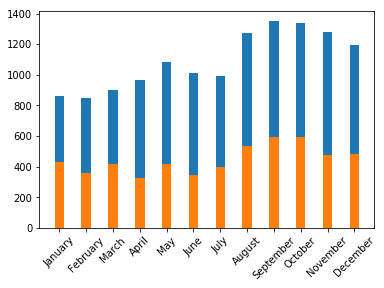

In [35]:
number_of_x = np.arange(12)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)
p3 = plt.bar(number_of_x, murder, .35)
month_plot = plt.xticks(number_of_x, df2.columns, rotation=45)


In [36]:
df3 = crime_df.groupby(['Offenses Severity', 'Arrest Year'])['Offenses Severity'].count().unstack('Arrest Year').fillna(0)
df3

Arrest Year,2016,2017,2018
Offenses Severity,,,
F,882.0,2462.0,2032.0
M,1949.0,5812.0,5338.0
Murder of 1st Degree,0.0,0.0,2.0


In [37]:
felonies = df3[:1].values[0]
felonies

array([ 882., 2462., 2032.])

In [38]:
misdemeanor = df3[1:2].values[0]
misdemeanor

array([1949., 5812., 5338.])

In [39]:
murder = df3[2:3].values[0]
murder

array([0., 0., 2.])

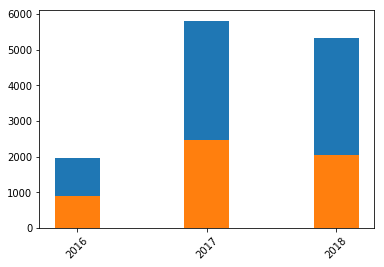

In [41]:
number_of_x = np.arange(3)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)
p3 = plt.bar(number_of_x, murder, .35)
year_plot = plt.xticks(number_of_x, df3.columns, rotation=45)